In [1]:
import pandas as pd
import cv2
import numpy as np

In [14]:
X_train = pd.read_pickle("data\df_X_train.pickle")
X_test = pd.read_pickle("data\df_X_test.pickle")
Y_train = pd.read_pickle("data\df_y_train.pickle")
Y_test = pd.read_pickle("data\df_y_test.pickle")

In [15]:
X_train.head()

,ampbw,imsizex,imsizey
0,"[[121, 121, 121, 122, 128, 131, 132, 132, 131,...",451,1006
1,"[[87, 83, 82, 82, 79, 53, 43, 39, 37, 37, 37, ...",588,814
2,"[[134, 141, 142, 142, 156, 190, 181, 180, 180,...",524,981
3,"[[117, 117, 116, 105, 103, 103, 103, 104, 113,...",508,1112
4,"[[119, 99, 98, 99, 99, 103, 133, 127, 122, 122...",521,956


In [16]:
Y_test['categ'].value_counts()

flat    23
nois    22
salt    18
gasc    13
Name: categ, dtype: int64

# Edge Detection

In [17]:
imgs = X_train['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))

X_train['edge'] = imgs_filt
    
imgs = X_test['ampbw']
imgs_filt = list()

for i, im in enumerate(imgs):
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8)
    imgs_filt.append(cv2.Canny(cv2.fastNlMeansDenoising(im, None, 50, 50, 7), 300, 100))
    
X_test['edge'] = imgs_filt


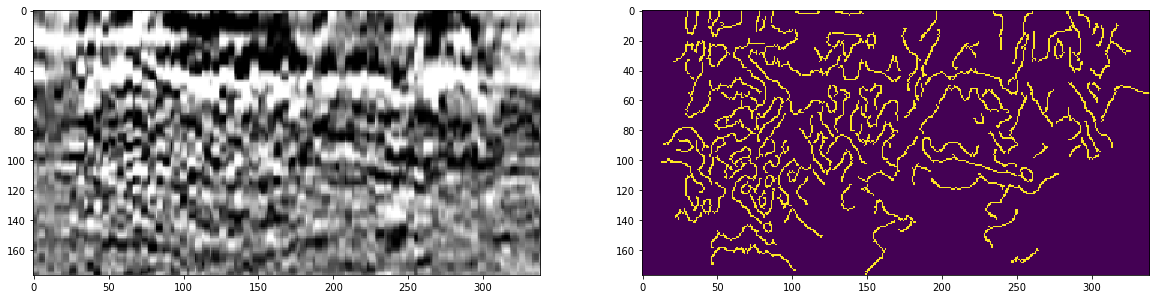

In [19]:
from matplotlib import pyplot as plt

i = 200

#meanfilt_data = cv2.fastNlMeansDenoising(images[2],None,50,50,7)
#meanfilt_data = cv2.
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_train['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_train['edge'].iloc[i])
plt.show()

# Gabor Filter Application

In [23]:
"""
Applying Gabor filter
"""
kernel = cv2.getGaborKernel((11, 11), 4, 11, 11, 1, 1, cv2.CV_32F)
#kernel /= math.sqrt((kernel * kernel).sum())
kernel /= np.sqrt((kernel * kernel).sum())

gabor_filt = list()
imgs = X_train['ampbw']

for im in imgs:
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
    gabor_filt.append(cv2.filter2D(im, -1, kernel)[:,:,0])
    
X_train['gabor'] = gabor_filt

gabor_filt = list()
imgs = X_test['ampbw']

for im in imgs:
    x, y = im.shape
    im = im.repeat(3).reshape(x, y, 3).astype(np.uint8) 
    gabor_filt.append(cv2.filter2D(im, -1, kernel)[:,:,0])
    
X_test['gabor'] = gabor_filt


In [24]:
X_test.head()

,ampbw,imsizex,imsizey,edge,gabor
0,"[[207, 208, 208, 205, 177, 163, 158, 158, 158,...",598,1289,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,"[[94, 94, 94, 93, 93, 93, 93, 97, 106, 111, 11...",350,696,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[128, 128, 129, 130, 133, 137, 140, 144, 149,..."
2,"[[163, 154, 154, 158, 186, 192, 193, 193, 187,...",169,603,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,"[[150, 151, 152, 152, 152, 155, 156, 156, 156,...",535,829,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[182, 182, 183, 184, 184, 185, 185, 186, 187,..."
4,"[[60, 60, 54, 52, 50, 45, 45, 45, 45, 50, 62, ...",462,850,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[97, 96, 94, 91, 88, 86, 85, 85, 87, 88, 90, ..."


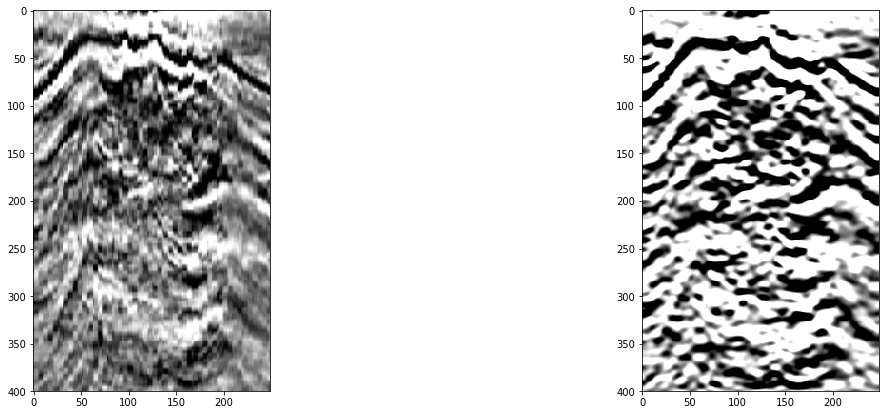

In [27]:
i=150
fig, axs = plt.subplots(ncols=2, figsize=(20,7))
axs[0].imshow(X_train['ampbw'].iloc[i],cmap='gray')
axs[1].imshow(X_train['gabor'].iloc[i], cmap='gray')

# Output pickle

In [29]:
X_train.to_pickle("data\\df_Xwfilt_train.pickle")
X_test.to_pickle("data\\df_Xwfilt_test.pickle")

In [ ]:
x[0]